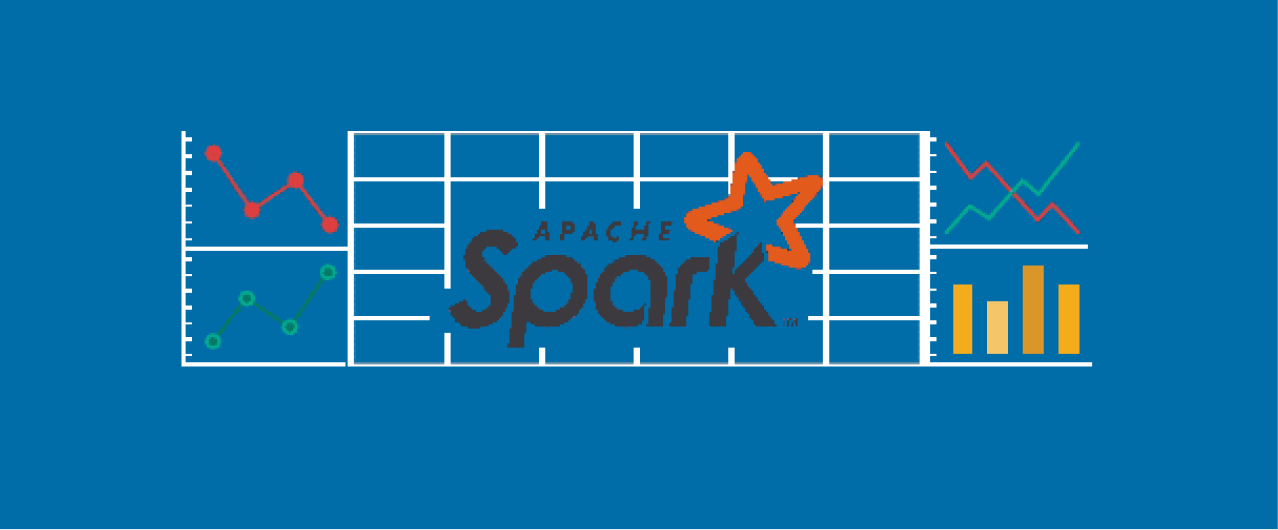

# **Spark SQL/DataFrame Handling Practice**

In [1]:
stocks = [
    ('Google', 'GOOGL', 'USA', 2984, 'USD'), 
    ('Netflix', 'NFLX', 'USA', 645, 'USD'),
    ('Amazon', 'AMZN', 'USA', 3518, 'USD'),
    ('Tesla', 'TSLA', 'USA', 1222, 'USD'),
    ('Tencent', '0700', 'Hong Kong', 483, 'HKD'),
    ('Toyota', '7203', 'Japan', 2006, 'JPY'),
    ('Samsung', '005930', 'Korea', 70600, 'KRW'),
    ('Kakao', '035720', 'Korea', 125000, 'KRW'),
]
stockSchema = ["name", "ticker", "country", "price", "currency"]
df = spark.createDataFrame(data=stocks, schema=stockSchema)

In [2]:
df.show()

+-------+------+---------+------+--------+
|   name|ticker|  country| price|currency|
+-------+------+---------+------+--------+
| Google| GOOGL|      USA|  2984|     USD|
|Netflix|  NFLX|      USA|   645|     USD|
| Amazon|  AMZN|      USA|  3518|     USD|
|  Tesla|  TSLA|      USA|  1222|     USD|
|Tencent|  0700|Hong Kong|   483|     HKD|
| Toyota|  7203|    Japan|  2006|     JPY|
|Samsung|005930|    Korea| 70600|     KRW|
|  Kakao|035720|    Korea|125000|     KRW|
+-------+------+---------+------+--------+



In [ ]:
# 1. df에서 name, ticker를 추출하시오 (df 메서드)

In [3]:
spark_df = df.select('name', 'ticker')
spark_df.show()

+-------+------+
|   name|ticker|
+-------+------+
| Google| GOOGL|
|Netflix|  NFLX|
| Amazon|  AMZN|
|  Tesla|  TSLA|
|Tencent|  0700|
| Toyota|  7203|
|Samsung|005930|
|  Kakao|035720|
+-------+------+



In [ ]:
# 2. df를 stocks 라는 view로 생성하시오

In [4]:
df.createOrReplaceTempView('stocks')

In [ ]:
# 3. view stocks를 사용하여 stocks view의 모든 컬럼을 추출하시오

In [6]:
spark.sql('select (*) from stocks').show()

+-------+------+---------+------+--------+
|   name|ticker|  country| price|currency|
+-------+------+---------+------+--------+
| Google| GOOGL|      USA|  2984|     USD|
|Netflix|  NFLX|      USA|   645|     USD|
| Amazon|  AMZN|      USA|  3518|     USD|
|  Tesla|  TSLA|      USA|  1222|     USD|
|Tencent|  0700|Hong Kong|   483|     HKD|
| Toyota|  7203|    Japan|  2006|     JPY|
|Samsung|005930|    Korea| 70600|     KRW|
|  Kakao|035720|    Korea|125000|     KRW|
+-------+------+---------+------+--------+



In [ ]:
# 4. stocks view에서 country가 Korea인 data만 추출하시오

In [8]:
spark.sql("select * from stocks where country='Korea'").show()

+-------+------+-------+------+--------+
|   name|ticker|country| price|currency|
+-------+------+-------+------+--------+
|Samsung|005930|  Korea| 70600|     KRW|
|  Kakao|035720|  Korea|125000|     KRW|
+-------+------+-------+------+--------+



In [ ]:
# 5. df에서 country가 Korea인 data를 추출하시오

In [10]:
df.select('*').where(df.country=='Korea').show()

+-------+------+-------+------+--------+
|   name|ticker|country| price|currency|
+-------+------+-------+------+--------+
|Samsung|005930|  Korea| 70600|     KRW|
|  Kakao|035720|  Korea|125000|     KRW|
+-------+------+-------+------+--------+



In [ ]:
# 6. stocks view에서 price 가 2000 초과하고 country가  USA인 데이터의 name과 price를 출력하시오

In [11]:
spark.sql('''select name, price from stocks
            where (price > 2000) and (country='USA')
        ''').show()

+------+-----+
|  name|price|
+------+-----+
|Google| 2984|
|Amazon| 3518|
+------+-----+



In [15]:
# 7. df에서 price 가 2000 초과하고 country가  USA인 데이터의 name과 price를 출력하시오
df.select('name', 'price')\
        .filter((df.price>2000)&(df.country=='USA')).show()

+------+-----+
|  name|price|
+------+-----+
|Google| 2984|
|Amazon| 3518|
+------+-----+



In [ ]:
# 8. stocks view에서 country가 U로 시작하는 데이터의 name과 price를 추출하시오

In [18]:
spark.sql("select name, price from stocks where country like 'U%'").show()

+-------+-----+
|   name|price|
+-------+-----+
| Google| 2984|
|Netflix|  645|
| Amazon| 3518|
|  Tesla| 1222|
+-------+-----+



In [ ]:
# 9. df에서 country가 U로 시작하는 데이터의 name과 price를 추출하시오

In [21]:
df.select('name', 'price').filter(df.country.like('U%')).show()

+-------+-----+
|   name|price|
+-------+-----+
| Google| 2984|
|Netflix|  645|
| Amazon| 3518|
|  Tesla| 1222|
+-------+-----+



In [ ]:
# 10. stocks view에서 country가 'U'로 시작하고 이름에 'e'가 포함되지 않은 데이터의 name과 price를 추출하시오.

In [24]:
spark.sql('''select name, price from stocks
            where (country like 'U%') and (name not like '%e%')
          ''').show()

+------+-----+
|  name|price|
+------+-----+
|Amazon| 3518|
+------+-----+



In [ ]:
# 11. df에서 countr가 'U'로 시작하고 이름에 'e'가 포함되지 않은 데이터의 name과 price를 추출하시오.

In [25]:
df.select('name', 'price').filter(df.country.like('U%') & (~df.name.like('%e%'))).show()

+------+-----+
|  name|price|
+------+-----+
|Amazon| 3518|
+------+-----+



In [ ]:
# 12. stocks view에서 price가 1000~10000인 데이터를 추출하시오

In [26]:
spark.sql('select * from stocks where price between 1000 and 10000').show()

+------+------+-------+-----+--------+
|  name|ticker|country|price|currency|
+------+------+-------+-----+--------+
|Google| GOOGL|    USA| 2984|     USD|
|Amazon|  AMZN|    USA| 3518|     USD|
| Tesla|  TSLA|    USA| 1222|     USD|
|Toyota|  7203|  Japan| 2006|     JPY|
+------+------+-------+-----+--------+

